In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 创建一个包含数据的DataFrame
data = {
    'x1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
    'x2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
    'x3': [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
    'x4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12],
    'y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]
}

# 转换为DataFrame
df = pd.DataFrame(data)

df


,x1,x2,x3,x4,y
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9
5,11,55,9,22,109.2
6,3,71,17,6,102.7
7,1,31,22,44,72.5
8,2,54,18,22,93.1
9,21,47,4,26,115.9


In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
model = ols('y ~ x1 + x2 + x3 + x4', data=df).fit()

# 获取ANOVA表格
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


             sum_sq   df         F    PR(>F)
x1        25.950911  1.0  4.337474  0.070822
x2         2.972478  1.0  0.496824  0.500901
x3         0.109090  1.0  0.018233  0.895923
x4         0.246975  1.0  0.041280  0.844071
Residual  47.863639  8.0       NaN       NaN


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# 创建DataFrame
data = {
    'x1': [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
    'x2': [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
    'x3': [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
    'x4': [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12],
    'y': [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]
}
df = pd.DataFrame(data)

def calculate_anova(df, order):
    """
    计算ANOVA表，展示不同变量顺序下的方差分析
    """
    # 准备自变量
    X = df[order]
    X = sm.add_constant(X)
    
    # 拟合模型
    model = sm.OLS(df['y'], X).fit()
    
    # 总平方和
    total_ss = np.sum((df['y'] - np.mean(df['y']))**2)
    
    # 回归平方和 & 残差平方和
    predicted_y = model.predict(X)
    regression_ss = np.sum((predicted_y - np.mean(df['y']))**2)
    residual_ss = np.sum((df['y'] - predicted_y)**2)
    
    # 自由度
    df_regression = len(order)
    df_residual = len(df['y']) - len(order) - 1
    df_total = len(df['y']) - 1
    
    # 均方
    regression_ms = regression_ss / df_regression
    residual_ms = residual_ss / df_residual
    
    # F统计量
    f_statistic = regression_ms / residual_ms
    p_value = 1 - stats.f.cdf(f_statistic, df_regression, df_residual)
    
    # 创建ANOVA表
    anova_table = pd.DataFrame({
        'Source': ['Regression', 'Residual', 'Total'],
        'SS': [regression_ss, residual_ss, total_ss],
        'df': [df_regression, df_residual, df_total],
        'MS': [regression_ms, residual_ms, np.nan],
        'F': [f_statistic, np.nan, np.nan],
        'p-value': [p_value, np.nan, np.nan]
    })
    
    print(f"ANOVA Table for Order: {order}")
    print(anova_table)
    print("\n变量系数p值:")
    for var, p_val in zip(['const'] + order, model.pvalues):
        print(f"{var}: {p_val}")
    print("\n" + "="*50 + "\n")
    
    return anova_table

# 尝试不同的变量顺序
orders = [
    ['x1', 'x2', 'x3', 'x4'],
    ['x2', 'x1', 'x3', 'x4'],
    ['x3', 'x1', 'x2', 'x4'],
    ['x4', 'x1', 'x2', 'x3']
]

# 执行ANOVA并比较结果
for order in orders:
    calculate_anova(df, order)

ANOVA Table for Order: ['x1', 'x2', 'x3', 'x4']
       Source           SS  df          MS           F       p-value
0  Regression  2667.899438   4  666.974859  111.479172  4.756182e-07
1    Residual    47.863639   8    5.982955         NaN           NaN
2       Total  2715.763077  12         NaN         NaN           NaN

变量系数p值:
const: 0.39913356338553874
x1: 0.0708216874297232
x2: 0.5009011034743003
x3: 0.8959226905101259
x4: 0.8440714732918552


ANOVA Table for Order: ['x2', 'x1', 'x3', 'x4']
       Source           SS  df          MS           F       p-value
0  Regression  2667.899438   4  666.974859  111.479172  4.756182e-07
1    Residual    47.863639   8    5.982955         NaN           NaN
2       Total  2715.763077  12         NaN         NaN           NaN

变量系数p值:
const: 0.3991335633855343
x2: 0.5009011034742938
x1: 0.07082168742972203
x3: 0.8959226905101225
x4: 0.8440714732918622


ANOVA Table for Order: ['x3', 'x1', 'x2', 'x4']
       Source           SS  df          MS  

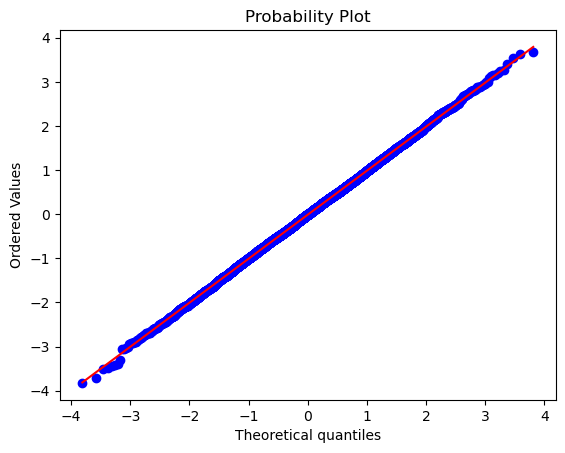

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 生成一组服从正态分布的数据
data = np.random.normal(0, 1, 10000)

# 绘制QQ图
stats.probplot(data, dist="norm", plot=plt)
plt.show()


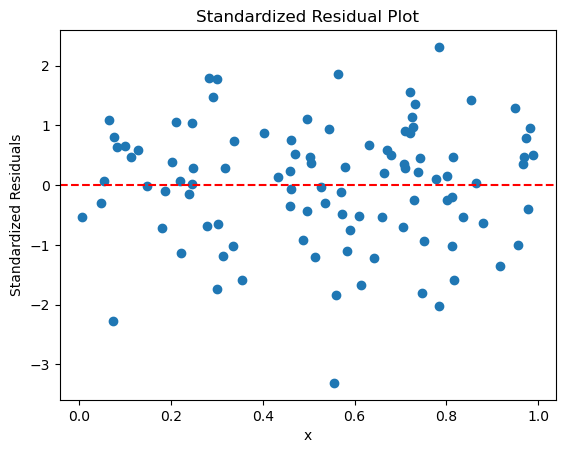

In [27]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 生成模拟数据
x = np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100) * 0.5  # y = 2x + 1 加上噪声

# 拟合回归模型
X = sm.add_constant(x)  # 添加常数项
model = sm.OLS(y, X).fit()

# 获取残差和标准化残差
residuals = model.resid
standardized_residuals = residuals / np.sqrt(model.mse_resid * (1 - model.get_influence().hat_matrix_diag))

# 绘制标准化残差图
plt.scatter(x, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')  # 绘制零水平线
plt.xlabel('x')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residual Plot')
plt.show()


<>:21: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
<>:21: SyntaxWarning: invalid escape sequence '\h'
<>:29: SyntaxWarning: invalid escape sequence '\h'
/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_12675/3852085236.py:21: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Fitted values ($\hat{y}$)')
/var/folders/81/r3mn1cj132134tmfyygd33zr0000gn/T/ipykernel_12675/3852085236.py:29: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Fitted values ($\hat{y}$)')


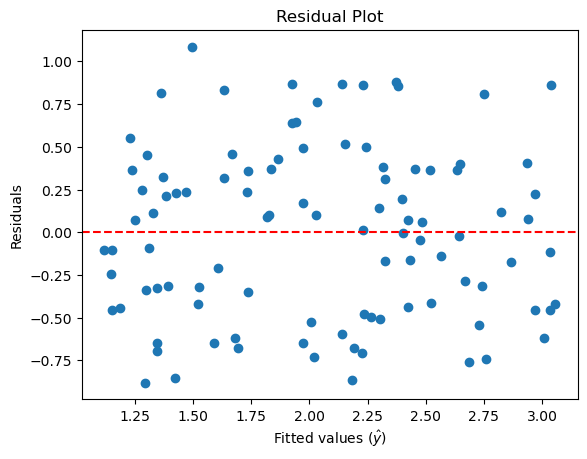

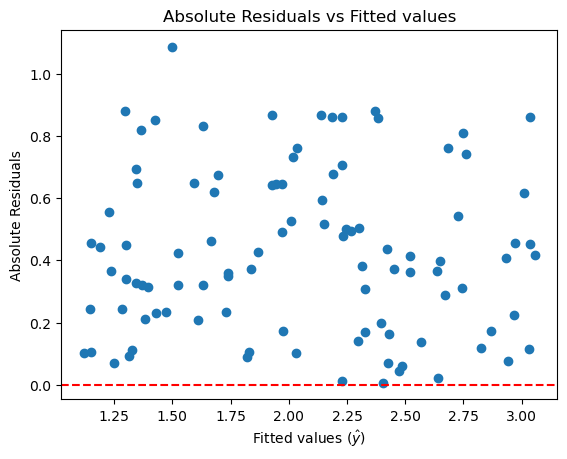

In [29]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 生成模拟数据
np.random.seed(0)
x = np.random.rand(100)
y = 2 * x + 1 + np.random.randn(100) * 0.5  # y = 2x + 1 + 噪声

# 拟合线性回归模型
X = sm.add_constant(x)  # 添加常数项
model = sm.OLS(y, X).fit()

# 获取拟合值和残差
y_pred = model.fittedvalues
residuals = model.resid

# 1. 绘制残差图，检查是否存在异方差性
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # 添加零线
plt.xlabel('Fitted values ($\hat{y}$)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 2. 绘制绝对残差图
plt.scatter(y_pred, np.abs(residuals))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values ($\hat{y}$)')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals vs Fitted values')
plt.show()
